[![Open In Collab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/worldcoin/open-iris/blob/dev/colab/MatchingEntities.ipynb)

# IRIS: _Matching entities_ tutorial

This Jupyter Notebook will walk you through the basics of how to use matchers available in the `iris` package. From it you will learn how to:
- Use the `HammingDistanceMatcher` matcher to compute distance between two eyes.

## 0. Installing `iris` package in the `SERVER` environment.

Install `iris` package

In [ ]:
# !pip install open-iris

Verify installation by printing `iris` version

In [2]:
import iris

print(iris.__version__)

1.8.2


Download sample IR images for experimenting.

In [10]:
!curl https://wld-ml-ai-data-public.s3.amazonaws.com/public-iris-images/example_orb_image_1.png -O ./subject1_first_image.png
!curl https://wld-ml-ai-data-public.s3.amazonaws.com/public-iris-images/example_orb_image_2.png -O ./subject1_second_image.png
!curl https://wld-ml-ai-data-public.s3.amazonaws.com/public-iris-images/example_orb_image_3.png -O ./subject2_image.png

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
 33  855k   33  288k    0     0   142k      0  0:00:06  0:00:02  0:00:04  142k
100  855k  100  855k    0     0   338k      0  0:00:02  0:00:02 --:--:--  338k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0curl: (6) Could not resolve host: .
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0

## 1. Use the `HammingDistanceMatcher` matcher to compute distance between two eyes.

Load all IR images with `opencv-python` package. 

In [14]:
import cv2

subject1_first_image = cv2.imread("./example_orb_image_1.png", cv2.IMREAD_GRAYSCALE)
subject1_second_image = cv2.imread("./example_orb_image_2.png", cv2.IMREAD_GRAYSCALE)
subject2_image = cv2.imread("./example_orb_image_3.png", cv2.IMREAD_GRAYSCALE)

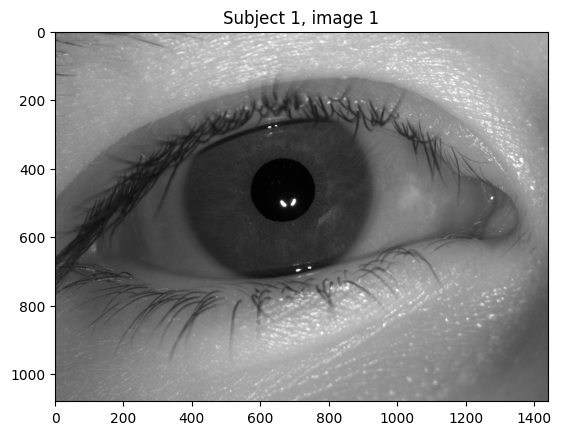

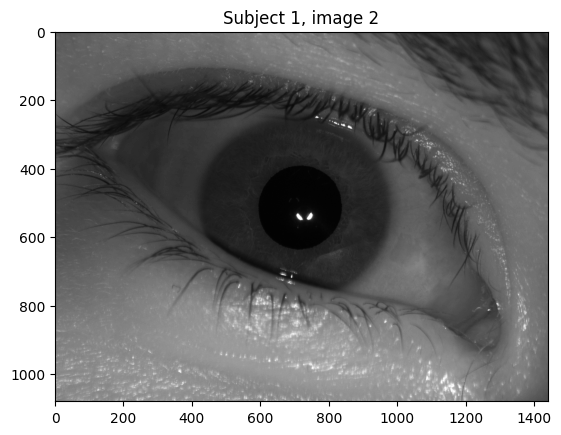

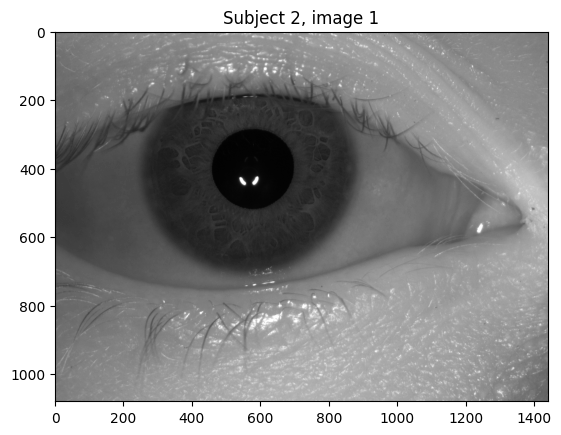

In [15]:
import matplotlib.pyplot as plt

plt.imshow(subject1_first_image, cmap='gray')
plt.title('Subject 1, image 1')
plt.show()

plt.imshow(subject1_second_image, cmap='gray')
plt.title('Subject 1, image 2')
plt.show()

plt.imshow(subject2_image, cmap='gray')
plt.title('Subject 2, image 1')
plt.show()

Create `IRISPipeline` object and compute `IrisTemplate`s for all images.

In [16]:
import iris

iris_pipeline = iris.IRISPipeline()

output_1 = iris_pipeline(subject1_first_image, eye_side="left")
subject1_first_code = output_1['iris_template']

output_2 = iris_pipeline(subject1_second_image, eye_side="left")
subject1_second_code = output_2['iris_template']

output_3 = iris_pipeline(subject2_image, eye_side="left")
subject2_code = output_3['iris_template']

Create a `HammingDistanceMatcher` matcher object.
```python
def __init__(
        self,
        rotation_shift: int = 15,
        nm_dist: Optional[confloat(ge=0, le=1, strict=True)] = None,
        weights: Optional[List[np.ndarray]] = None,
    ) -> None:
        """Assign parameters.

        Args:
            rotation_shift (int): rotations allowed in matching, converted to shifts in columns. Defaults to 15.
            nm_dist (Optional[confloat(ge=0, le = 1, strict=True)]): nonmatch distance used for normalized HD. Optional paremeter for normalized HD. Defaults to None.
            weights (Optional[List[np.ndarray]]): list of weights table. Optional paremeter for weighted HD. Defaults to None.
        """
```

In [17]:
matcher = iris.HammingDistanceMatcher()

Call `run` method and provide two `IrisTemplate`s to compute distances.
```python
def run(self, template_probe: IrisTemplate, template_gallery: IrisTemplate) -> float:
```

In [18]:
same_subjects_distance = matcher.run(subject1_first_code, subject1_second_code)

print(f"Computed distance between eyes of the `subject_1` is {same_subjects_distance:.4f}")

different_subjects_distance = matcher.run(subject1_first_code, subject2_code)

print(f"Computed distance between eyes of the `subject_1` and `subject_2` is {different_subjects_distance:.4f}")

Test
Computed distance between eyes of the `subject_1` is 0.1466
Test
Computed distance between eyes of the `subject_1` and `subject_2` is 0.4529


The recommended threshold is between 0.34 and 0.39 depending on the sensibitity of your use case, 0.37 is a good choice if you do not favor False Matches or False Non-Matches.

In this example, the two iris images from the same subject are clearly matched, and those form different subjects clearly non-matched.

### Thank you for making it to the end of this tutorial!